In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import warnings
warnings.filterwarnings("ignore")

## 2.数据预处理

### 2.1读入excel文件获得数据

In [65]:
df = pd.read_excel("sale.xlsx",encoding="gbk",dtype={'社保卡号': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6579 entries, 0 to 6578
Data columns (total 7 columns):
购药时间    6577 non-null object
社保卡号    6579 non-null object
商品编码    6577 non-null float64
商品名称    6578 non-null object
销售数量    6577 non-null float64
应收金额    6577 non-null float64
实收金额    6577 non-null float64
dtypes: float64(4), object(3)
memory usage: 359.9+ KB


In [66]:
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,NaN,nan,NaN,NaN,NaN,NaN,NaN
1,NaN,001616527,NaN,三九感冒灵,NaN,NaN,NaN
2,2016-01-01 星期五,001616528,236701.0,三九感冒灵,7.0,196.0,182.00
3,2016-01-02 星期六,001616528,236701.0,三九感冒灵,3.0,84.0,84.00
4,2016-01-06 星期三,0010070343428,236701.0,三九感冒灵,3.0,84.0,73.92


## 2.2删除缺失值

In [67]:
df.dropna(how='any', inplace=True)

In [68]:
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
2,2016-01-01 星期五,001616528,236701.0,三九感冒灵,7.0,196.0,182.00
3,2016-01-02 星期六,001616528,236701.0,三九感冒灵,3.0,84.0,84.00
4,2016-01-06 星期三,0010070343428,236701.0,三九感冒灵,3.0,84.0,73.92
5,2016-01-11 星期一,0013389528,236701.0,三九感冒灵,1.0,28.0,28.00
6,2016-01-15 星期五,00101554328,236701.0,三九感冒灵,8.0,224.0,208.00


In [69]:
??df.dropna

## 2.3列重命名

In [70]:
df.rename(columns={'购药时间':'time', '商品编码': 'prodid'}, inplace=True)

In [71]:
df.head()

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额
2,2016-01-01 星期五,001616528,236701.0,三九感冒灵,7.0,196.0,182.00
3,2016-01-02 星期六,001616528,236701.0,三九感冒灵,3.0,84.0,84.00
4,2016-01-06 星期三,0010070343428,236701.0,三九感冒灵,3.0,84.0,73.92
5,2016-01-11 星期一,0013389528,236701.0,三九感冒灵,1.0,28.0,28.00
6,2016-01-15 星期五,00101554328,236701.0,三九感冒灵,8.0,224.0,208.00


## 2.4数据类型转化

In [72]:
df[pd.isnull(df['prodid'])]

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额


In [73]:
df['prodid'] = df['prodid'].astype('int')

In [74]:
df.head()

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.00
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3.0,84.0,84.00
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3.0,84.0,73.92
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1.0,28.0,28.00
6,2016-01-15 星期五,00101554328,236701,三九感冒灵,8.0,224.0,208.00


In [75]:
s1 = df['time'].str.split(' ')
s1

2       [2016-01-01, 星期五]
3       [2016-01-02, 星期六]
4       [2016-01-06, 星期三]
5       [2016-01-11, 星期一]
6       [2016-01-15, 星期五]
7       [2016-01-20, 星期三]
8       [2016-01-31, 星期日]
9       [2016-02-17, 星期三]
10      [2016-02-22, 星期一]
11      [2016-02-24, 星期三]
12      [2016-03-05, 星期六]
13      [2016-03-05, 星期六]
14      [2016-03-05, 星期六]
15      [2016-03-07, 星期一]
16      [2016-03-09, 星期三]
17      [2016-03-15, 星期二]
18      [2016-03-15, 星期二]
19      [2016-03-15, 星期二]
20      [2016-03-20, 星期日]
21      [2016-03-22, 星期二]
22      [2016-03-23, 星期三]
23      [2016-03-24, 星期四]
24      [2016-03-24, 星期四]
25      [2016-03-28, 星期一]
26      [2016-03-29, 星期二]
27      [2016-04-05, 星期二]
28      [2016-04-07, 星期四]
29      [2016-04-13, 星期三]
30      [2016-04-22, 星期五]
31      [2016-05-01, 星期日]
              ...        
6549    [2016-04-09, 星期六]
6550    [2016-04-10, 星期日]
6551    [2016-04-10, 星期日]
6552    [2016-04-10, 星期日]
6553    [2016-04-12, 星期二]
6554    [2016-04-13, 星期三]
6555    [2016-04-13, 星期三]
6556    [201

In [76]:
type(s1)

pandas.core.series.Series

In [77]:
s1.index

Int64Index([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            6569, 6570, 6571, 6572, 6573, 6574, 6575, 6576, 6577, 6578],
           dtype='int64', length=6577)

In [78]:
s1.index = range(0, 6577)
s1.index

RangeIndex(start=0, stop=6577, step=1)

 修改series的s1的索引为0-6577

In [79]:
type(s1[0][0])

str

In [80]:
s1.head()

0    [2016-01-01, 星期五]
1    [2016-01-02, 星期六]
2    [2016-01-06, 星期三]
3    [2016-01-11, 星期一]
4    [2016-01-15, 星期五]
Name: time, dtype: object

构造能够将s1分成时间序列和星期序列

In [81]:
datatime_list = []
week_list = []

def getdate_week(s):
    global datatime_list
    global week_list
    for i in s.index:
        datatime_list.append(s[i][0])
        week_list.append(s[i][1])
    
    

getdate_week(s1)   

In [82]:
datatime_list

['2016-01-01',
 '2016-01-02',
 '2016-01-06',
 '2016-01-11',
 '2016-01-15',
 '2016-01-20',
 '2016-01-31',
 '2016-02-17',
 '2016-02-22',
 '2016-02-24',
 '2016-03-05',
 '2016-03-05',
 '2016-03-05',
 '2016-03-07',
 '2016-03-09',
 '2016-03-15',
 '2016-03-15',
 '2016-03-15',
 '2016-03-20',
 '2016-03-22',
 '2016-03-23',
 '2016-03-24',
 '2016-03-24',
 '2016-03-28',
 '2016-03-29',
 '2016-04-05',
 '2016-04-07',
 '2016-04-13',
 '2016-04-22',
 '2016-05-01',
 '2016-05-05',
 '2016-05-05',
 '2016-05-05',
 '2016-05-08',
 '2016-05-15',
 '2016-05-16',
 '2016-05-17',
 '2016-05-21',
 '2016-05-27',
 '2016-05-27',
 '2016-05-28',
 '2016-05-28',
 '2016-05-28',
 '2016-06-04',
 '2016-06-05',
 '2016-06-08',
 '2016-06-15',
 '2016-06-18',
 '2016-06-25',
 '2016-06-27',
 '2016-06-29',
 '2016-06-30',
 '2016-07-01',
 '2016-07-01',
 '2016-07-11',
 '2016-07-11',
 '2016-07-19',
 '2016-03-19',
 '2016-03-23',
 '2016-04-26',
 '2016-04-28',
 '2016-05-02',
 '2016-05-07',
 '2016-05-15',
 '2016-07-12',
 '2016-01-06',
 '2016-01-

### 2.5在数据的最后一列加入datetime_list和week_list

In [83]:
df.head(5)

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.00
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3.0,84.0,84.00
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3.0,84.0,73.92
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1.0,28.0,28.00
6,2016-01-15 星期五,00101554328,236701,三九感冒灵,8.0,224.0,208.00


In [84]:
df['datetime'] = datatime_list

In [85]:
df['weekday'] = week_list

In [86]:
df.head()

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.00,2016-01-01,星期五
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3.0,84.0,84.00,2016-01-02,星期六
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3.0,84.0,73.92,2016-01-06,星期三
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1.0,28.0,28.00,2016-01-11,星期一
6,2016-01-15 星期五,00101554328,236701,三九感冒灵,8.0,224.0,208.00,2016-01-15,星期五


### 2.6按照销售时间date-time升序排列

In [87]:
df_sort = df.sort_values(by='datetime')
df_sort.head(5)

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五
401,2016-01-01 星期五,0010074599128,2367011,开博通,5.0,140.0,125.0,2016-01-01,星期五
400,2016-01-01 星期五,0010072612028,2367011,开博通,1.0,28.0,25.0,2016-01-01,星期五
3890,2016-01-01 星期五,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0,2016-01-01,星期五
2700,2016-01-01 星期五,0013448228,861507,苯磺酸氨氯地平片(安内真),1.0,9.5,8.5,2016-01-01,星期五


In [88]:
df.head(1)

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五


In [89]:
df_sort.head()

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五
401,2016-01-01 星期五,0010074599128,2367011,开博通,5.0,140.0,125.0,2016-01-01,星期五
400,2016-01-01 星期五,0010072612028,2367011,开博通,1.0,28.0,25.0,2016-01-01,星期五
3890,2016-01-01 星期五,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0,2016-01-01,星期五
2700,2016-01-01 星期五,0013448228,861507,苯磺酸氨氯地平片(安内真),1.0,9.5,8.5,2016-01-01,星期五


将date-time列有str类型转化为int类型

In [90]:
df_sort['datetime'] = df_sort['datetime'].astype('datetime64')
df['datetime'] = df['datetime'].astype('datetime64')

In [91]:
df_sort.head()

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五
401,2016-01-01 星期五,0010074599128,2367011,开博通,5.0,140.0,125.0,2016-01-01,星期五
400,2016-01-01 星期五,0010072612028,2367011,开博通,1.0,28.0,25.0,2016-01-01,星期五
3890,2016-01-01 星期五,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0,2016-01-01,星期五
2700,2016-01-01 星期五,0013448228,861507,苯磺酸氨氯地平片(安内真),1.0,9.5,8.5,2016-01-01,星期五


In [92]:
df.head(1)

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五


In [93]:
df_sort.head(1)

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五


## 3.简单数据分析

In [94]:
df.head(1)

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五


In [95]:
d1 = Series(datatime_list)

In [96]:
d2 = Series(week_list)

In [97]:
d1

0       2016-01-01
1       2016-01-02
2       2016-01-06
3       2016-01-11
4       2016-01-15
5       2016-01-20
6       2016-01-31
7       2016-02-17
8       2016-02-22
9       2016-02-24
10      2016-03-05
11      2016-03-05
12      2016-03-05
13      2016-03-07
14      2016-03-09
15      2016-03-15
16      2016-03-15
17      2016-03-15
18      2016-03-20
19      2016-03-22
20      2016-03-23
21      2016-03-24
22      2016-03-24
23      2016-03-28
24      2016-03-29
25      2016-04-05
26      2016-04-07
27      2016-04-13
28      2016-04-22
29      2016-05-01
           ...    
6547    2016-04-09
6548    2016-04-10
6549    2016-04-10
6550    2016-04-10
6551    2016-04-12
6552    2016-04-13
6553    2016-04-13
6554    2016-04-14
6555    2016-04-15
6556    2016-04-15
6557    2016-04-15
6558    2016-04-15
6559    2016-04-16
6560    2016-04-17
6561    2016-04-18
6562    2016-04-21
6563    2016-04-22
6564    2016-04-24
6565    2016-04-25
6566    2016-04-25
6567    2016-04-25
6568    2016

### 3.1月均消费次数

要点：

同一个日期和同一个社保卡号的多个消费记录算作一次消费

可以将单独两列抽出来单独分析，先去重复，然后再计数

这个分析可以画一个每个月的消费次数的柱状图

In [98]:
df.columns

Index(['time', '社保卡号', 'prodid', '商品名称', '销售数量', '应收金额', '实收金额', 'datetime',
       'weekday'],
      dtype='object')

In [99]:
df.head(1)

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五


In [100]:
df_duplicated = df.duplicated(subset=['datetime', '社保卡号'], keep='first')

In [101]:
df_duplicated.describe()

count      6577
unique        2
top       False
freq       5398
dtype: object

In [102]:
df_duplicated.value_counts()

False    5398
True     1179
dtype: int64

当数据量比较大的时候，可以看看重复数据和非重复数据的计数分布,True表示重复的

默认保留第一个出现的重复值，删除掉后面的重复值

In [103]:
df_unique = df.drop_duplicates(subset=['datetime', '社保卡号'], keep='first')

In [104]:
df_unique

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.00,2016-01-01,星期五
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3.0,84.0,84.00,2016-01-02,星期六
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3.0,84.0,73.92,2016-01-06,星期三
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1.0,28.0,28.00,2016-01-11,星期一
6,2016-01-15 星期五,00101554328,236701,三九感冒灵,8.0,224.0,208.00,2016-01-15,星期五
7,2016-01-20 星期三,0013389528,236701,三九感冒灵,1.0,28.0,28.00,2016-01-20,星期三
8,2016-01-31 星期日,00101464928,236701,三九感冒灵,2.0,56.0,56.00,2016-01-31,星期日
9,2016-02-17 星期三,0011177328,236701,三九感冒灵,5.0,149.0,131.12,2016-02-17,星期三
10,2016-02-22 星期一,0010065687828,236701,三九感冒灵,1.0,29.8,26.22,2016-02-22,星期一
11,2016-02-24 星期三,0012602828,236701,三九感冒灵,4.0,119.2,104.89,2016-02-24,星期三


consume_time_date_ser 是将 date-time 作为 index，构建的 cardno 的时间序列。

In [105]:
consume_time_date_ser = pd.Series(list(df_unique['社保卡号']), index = df_unique['datetime'])

In [106]:
consume_time_date_ser

datetime
2016-01-01        001616528
2016-01-02        001616528
2016-01-06    0010070343428
2016-01-11       0013389528
2016-01-15      00101554328
2016-01-20       0013389528
2016-01-31      00101464928
2016-02-17       0011177328
2016-02-22    0010065687828
2016-02-24       0012602828
2016-03-05    0010026389628
2016-03-05      00102285028
2016-03-05    0010077400828
2016-03-07    0010077400828
2016-03-09    0010079843728
2016-03-15    0010031328528
2016-03-15      00100703428
2016-03-15       0010712328
2016-03-20       0011668828
2016-03-22    0010066351928
2016-03-23      00102133328
2016-03-24    0010078873928
2016-03-24      00101924628
2016-03-28    0010075233228
2016-03-29       0013189428
2016-04-05    0010079849328
2016-04-07       0011652628
2016-04-13       0011005128
2016-04-22       0010344628
2016-05-01    0010070313828
                  ...      
2016-03-28      00103924428
2016-03-31    0010015684428
2016-03-31    0010053572528
2016-04-05       0011778628
2016-04-09 

按照时间序列索引进行排序

In [107]:
consume_time_date_ser.sort_index()

datetime
2016-01-01        001616528
2016-01-01       0012697828
2016-01-01      00103283128
2016-01-01    0010072612028
2016-01-01    0010074599128
2016-01-01    0010014289328
2016-01-01    0010073966328
2016-01-01    0010015658428
2016-01-01       0013169628
2016-01-01       0011778628
2016-01-01      00105526028
2016-01-01       0011743428
2016-01-01       0011811728
2016-01-01       0013331728
2016-01-01       0013401428
2016-01-01      00107891628
2016-01-01       0010616728
2016-01-01      00101470528
2016-01-01    0010017493928
2016-01-01    0010060654328
2016-01-01       0013448228
2016-01-02       0011817228
2016-01-02       0012633728
2016-01-02        001616528
2016-01-02      00104837028
2016-01-02    0010016991328
2016-01-02    0010039299528
2016-01-02      00103906828
2016-01-02      00108946728
2016-01-02    0010083763228
                  ...      
2016-07-18    0010056054428
2016-07-18    0010076068128
2016-07-18    0010081666328
2016-07-18      00101467428
2016-07-18 

计算总天数

In [108]:
consume_time_date_ser.sort_index().index[0]

Timestamp('2016-01-01 00:00:00')

In [109]:
consume_time_date_ser.sort_index().index[-1]

Timestamp('2016-07-19 00:00:00')

In [110]:
days = consume_time_date_ser.sort_index().index[-1] - consume_time_date_ser.sort_index().index[0]

In [111]:
days

Timedelta('200 days 00:00:00')

In [115]:
months = int(days.days/30) + 1

In [116]:
months

7

In [117]:
months_consume = consume_time_date_ser.count() / months

In [118]:
months_consume

771.1428571428571

按月份来统计消费次数

In [121]:
consume_time_date_ser.head(1)

datetime
2016-01-01    001616528
dtype: object

In [119]:
month_tiime = consume_time_date_ser.groupby(consume_time_date_ser.index.month).count()

In [120]:
month_tiime

datetime
1     853
2     623
3     825
4    1054
5     775
6     755
7     513
dtype: int64

Text(0,0.5,'Consume')

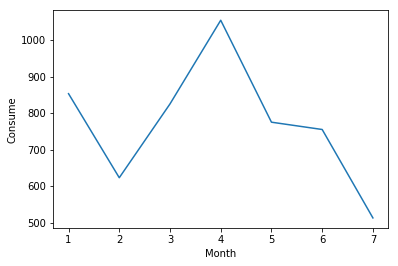

In [123]:
plt.plot(month_tiime.index, month_tiime)
plt.xlabel("Month")
plt.ylabel('Consume')

### 3.2月均消费金额

月均消费金额 = 总消费金额 / 月份数

这里可以画一个每月消费总额的柱状图

In [124]:
df.head()

,time,社保卡号,prodid,商品名称,销售数量,应收金额,实收金额,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.00,2016-01-01,星期五
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3.0,84.0,84.00,2016-01-02,星期六
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3.0,84.0,73.92,2016-01-06,星期三
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1.0,28.0,28.00,2016-01-11,星期一
6,2016-01-15 星期五,00101554328,236701,三九感冒灵,8.0,224.0,208.00,2016-01-15,星期五


In [125]:
tolal_money = df['实收金额'].sum()

In [126]:
tolal_money / months

43518.60857142857

构建以实收金额 actualmoney 的时间序列 data_consume_actual

In [127]:
data_consume_actual = pd.Series(list(df['实收金额']), index = list(df['datetime']))

In [128]:
data_consume_actual.head()

2016-01-01    182.00
2016-01-02     84.00
2016-01-06     73.92
2016-01-11     28.00
2016-01-15    208.00
dtype: float64

通过 month 分组，对组内数据进行求和，求和结果为每月的实收金额总和

In [129]:
month_consume = data_consume_actual.groupby(data_consume_actual.index.month).sum()

In [130]:
month_consume

1    49387.68
2    40105.08
3    41418.85
4    48802.26
5    46537.47
6    48258.70
7    30120.22
dtype: float64

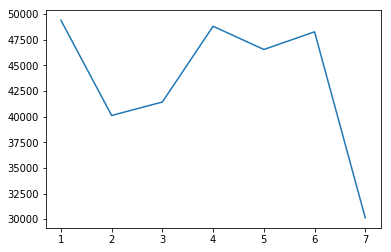

In [131]:
plt.plot(month_consume.index, month_consume)

### 3.3客单价
客单价（per customer transaction）是指商场（超市）每一个顾客平均购买商品的金额，客单价也即是平均交易金额。

### 3.4消费趋势
分组也是根据 week 进行的分组，之后求和，类似于上面按照月的来求和

画出随着 week 变化与 实收金额 actualmoney 的变化趋势